In [10]:
from modelclass import model

# Load the 2 models

In [11]:
mnpl_mf    ,bline_mf    = model.modelload('data/npl_mf',   run=True,keep='Baseline-mf',  silent=1)
mnpl_em_dm ,bline_em_dm = model.modelload('data/npl_em_dm',run=True,keep='Baseline_em_dm',silent=1)

Zipped file read:  C:\modelflow manual raw models\npl\data\NPL_MF.pcim
Zipped file read:  C:\modelflow manual raw models\npl\data\NPL_EM_DM.pcim


In [12]:
mnpl_mf.model_description

'Nepal macro financial MF model'

In [13]:
mnpl_em_dm.model_description

'Nepal climate EM_DM model)'

# Shock the oilprice and run the model 

In [14]:
oilshock  = 20 
_ = mnpl_mf(bline_mf.upd(f'<2024> WLDFCRUDE_PETRO + {oilshock}'),keep=f'MF Oilshock =  {oilshock}' )
_ = mnpl_em_dm(bline_em_dm.upd(f'<2024> WLDFCRUDE_PETRO + {oilshock}'),keep=f'EM_DM Oilshock =  {oilshock}' )

# Merge the keept solutions from the 2 models 

In [19]:
mnpl_mf.keep_solutions = mnpl_mf.keep_solutions | mnpl_em_dm.keep_solutions

# Define variables and plot

In [20]:
lookat =  mnpl_mf['#Headline'].names + ['*REER  *GGBALPRIMCN *CCEMISCO2TKN WLDFCRUDE_PETRO *NECONPRVTKN *NEGDIFTOTKN               ']

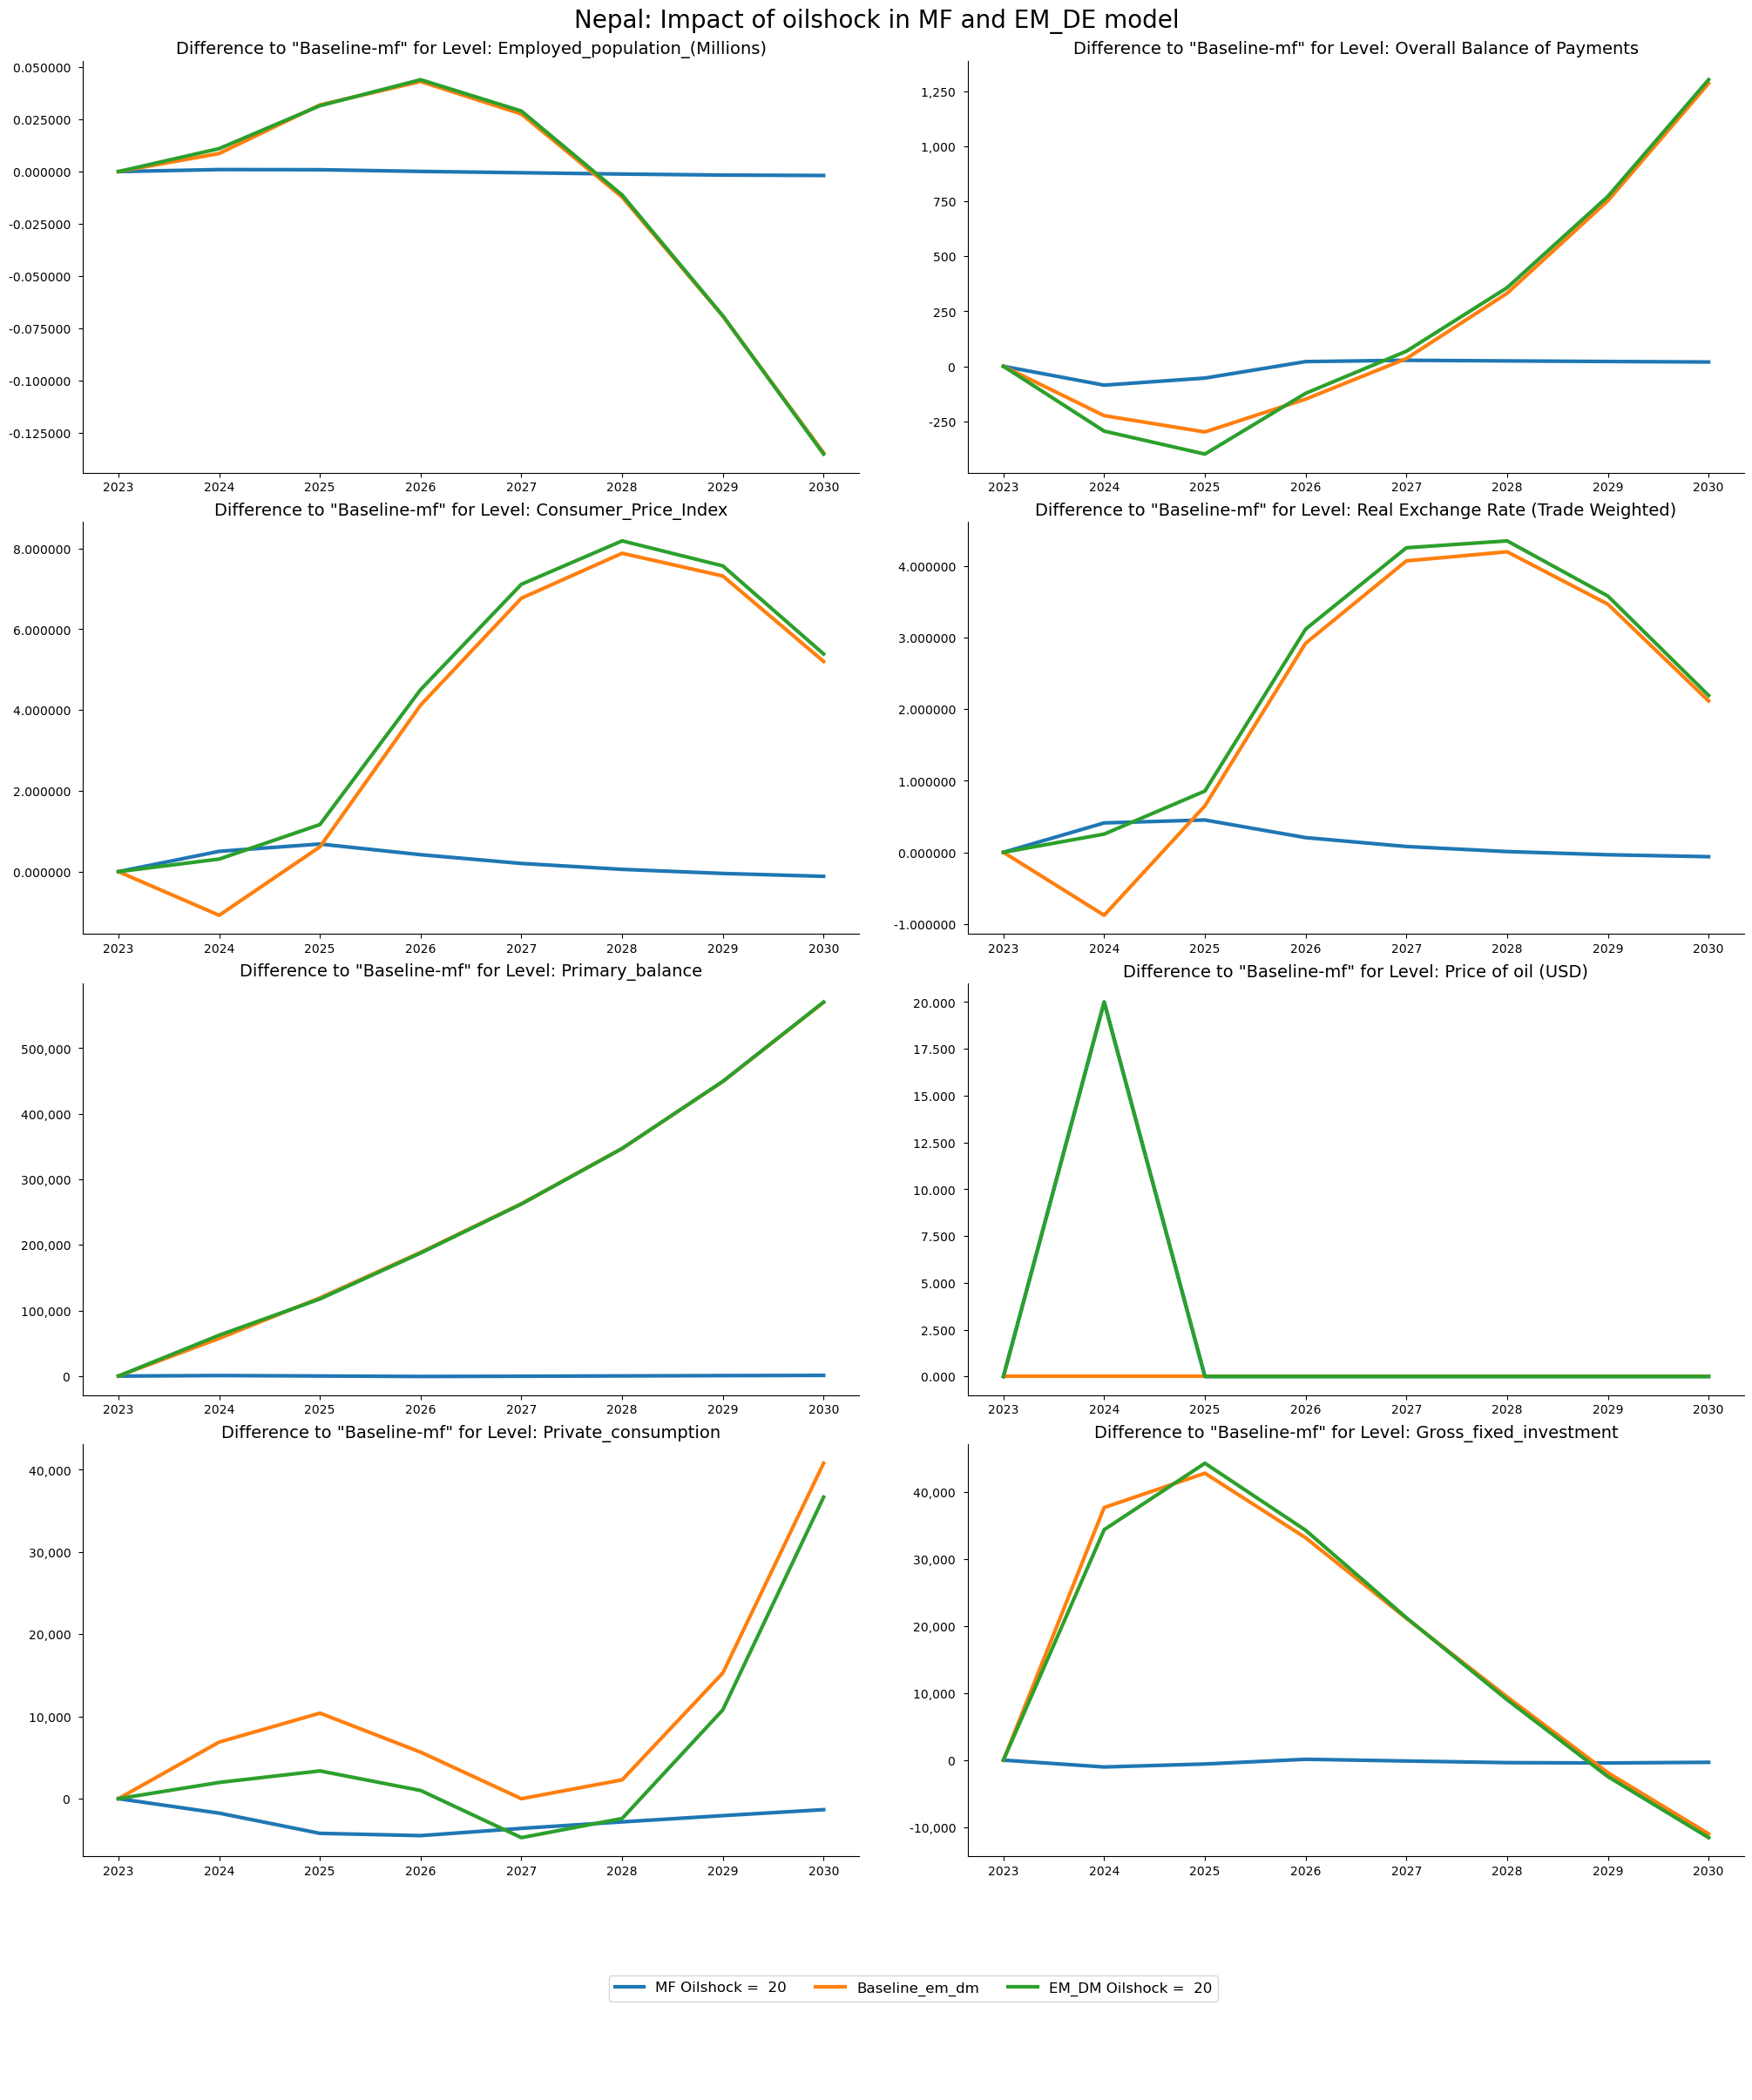

In [21]:
figs = mnpl_mf.keep_plot(lookat,diff=True,samefig=1,title=f'Nepal: Impact of oilshock in MF and EM_DE model',legend=1);

# save the chart

In [18]:
mnpl_mf.savefigs(figs,extensions= ['pdf','svg'],xopen=False,experimentname = 'two models',addname='_oil_dif')

'Saved at: c:\\modelflow manual raw models\\npl\\graph\\two models'